In [ ]:
#|default_exp peakpuzzle

# The peak pattern puzzle 

> Matching peak patterns 

In [ ]:
#|hide 
#%matplotlib 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#|hide 
import os

In [ ]:
#|hide 
os.chdir('/home/frank/Work/DATA/maxrf4u-data/')

We now arrive at the central problem of MA-XRF analysis. Given a spectrum with some peaks, and given the theoretical emission peak patterns for different chemical elements, which chemical elements are present in the sample? This is what I call the peak pattern puzzle. 

It is important to note that not all peaks are always due to the actual emission of chemical elements present in the scanned object. Other peaks are generated by the instrument itself. And small peaks can also just be noise.  Instrument peaks are common to all spectra.  For example, the large peak observed in all spectra near zero energy is a result of the instrument detector physics. Other peaks above 18 keV are due emission and subsequent scattering of the rhodium anode present in the x-ray tube. 

In order to plot an overview of emission patterns import `plot_patterns()`. To simplify our analysis let's exclude the light elements and rare elements that we will not find in drawings.  

In [ ]:
from maxrf4u import get_patterns, plot_patterns, all_elements  

In [ ]:
#|code-fold: true 

# elements of interest 
# adapt selection by (un)commenting  
'''
all_elements = ['#H', '#He', '#Li', '#Be', '#B', '#C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 
                'Al', 'Si', 'P', 'S', 'Cl', '#Ar', 'K', 'Ca', '#Sc', 'Ti', 'V', 'Cr', 
                'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', '#Ga', '#Ge', 'As', '#Se', 'Br', 
                '#Kr', '#Rb', 'Sr', '#Y', '#Zr', '#Nb', '#Mo', '#Tc', '#Ru', 'Rh', '#Pd', 
                'Ag', 'Cd', '#In', 'Sn', '#Sb', '#Te', 'I', '#Xe', '#Cs', 'Ba', '#La', '#Hf', 
                '#Ta', '#W', '#Re', '#Os', '#Ir', '#Pt', '#Au', 'Hg', '#Tl', 'Pb', '#Bi', 
                '#Po', '#At', '#Rn', '#Fr', '#Ra', '#Ac', '#Rf', '#Db', '#Sg', '#Bh', '#Hs', 
                '#Mt', '#Ds', '#Rg', '#Cn', '#Nh', '#Fl', '#Mc', '#Lv', '#Ts', '#Og']
'''

elements = [elem for elem in all_elements if not '#' in elem]

print('elements = ', elements)

elements =  ['N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'As', 'Br', 'Sr', 'Rh', 'Ag', 'Cd', 'Sn', 'I', 'Ba', 'Hg', 'Pb']


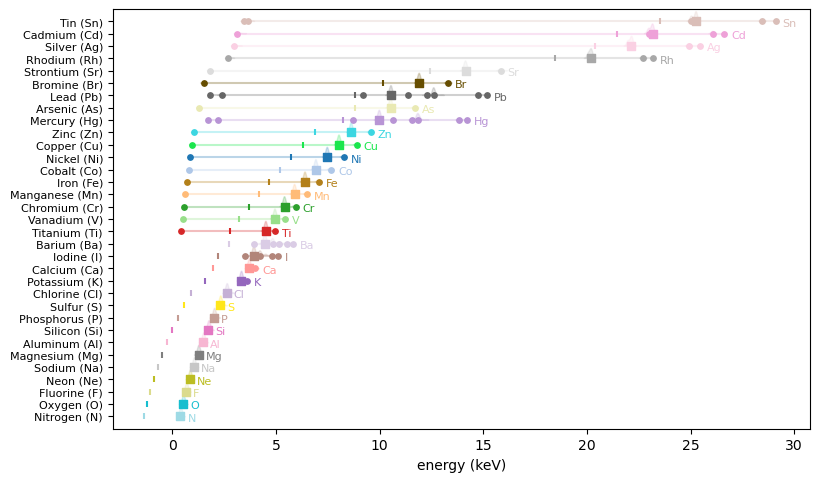

In [ ]:
plot_patterns(); 

In the previous section, out of one million spectra, we have cherry picked 22 hotmax spectra and within each spectrum detected potentially significant peaks exceeding the Poisson noise level. We can now proceed to solve the peak pattern puzzle for each hotmax spectrum. In other words, for each spectrum explain the presence of each significant (numbered) peak. Can we attribute a given peak to a specific chemical element, the instrument or noise? 

In other words, we can start to 'explain away' all peaks. It is highly instructive to walk through some interesting hotmax spectra and see which element patterns explain the peak patterns that we observe. To do so, import the `plot_puzzle()` function. 

In [ ]:
from maxrf4u import plot_puzzle, plot_ptrn 

In [ ]:
fig, ax_ptrns, ax_spectr = plot_puzzle('RP-T-1898-A-3689.datastack', 0, color_select=['Ca'])

RP-T-1898-A-3689.datastack:

/
 ├── compton_peak_energy (1,) float64
 ├── hotmax_peak_idxs_list (22, 3) int64
 ├── hotmax_spectra (22, 4096) float32
 ├── hotmax_spots (22, 2) int64
 ├── imvis_extent (4,) int64
 ├── imvis_reg (1692, 1592, 4) float32
 ├── imvis_reg_highres (4920, 4629, 4) float32
 ├── maxrf_cube (1692, 1592, 4096) float32
 ├── maxrf_energies (4096,) float64
 ├── maxrf_maxspectrum (4096,) float32
 ├── maxrf_sumspectrum (4096,) float64
 └── test_list (3, 3) int64


AssertionError: Dataset not found: hotmax_pixels

In the puzzle plot for hotmax spectrum **#0** above, beside instrument peaks, all other peaks are rather small. I would say that only sub peak **(4)** can be explained as the $K_{\alpha}$ emission of calcium. 

In [ ]:
plot_puzzle('RP-T-1898-A-3689.datastack', 2, elements=['Pb', 'As', 'S'], color_select=['Pb', 'Ca', 'Fe', 'S']);

..

In hotmax spectrum **#2** above, one can see that sub peaks **\[0\]**, **\[1\]**, **\[3\]** and **\[6\]** can all be explained by the emission of lead (Pb). The tiny peaks **\[8\]** and **\[9\]** are explained by respectively iron (Fe) and calcium (Ca).   

In [ ]:
plot_puzzle('RP-T-1898-A-3689.datastack', 3, color_select=['Cl', 'Ca', 'Fe', 'Zn']);

..

In hotmax spectrum **#3** sub peak **\[3\]** interestingly indicates the presence of chlorine (Cl). Furthermore we find evidence for calcium (Ca), iron (Fe), and perhaps zinc (Zn). 

In [ ]:
n = 0
ax0, ax1 = plot_puzzle(hma, n) 

# patterns 
plot_ptrn('Ca', -1, ax1);

..

In [ ]:
n = 1
ax0, ax1 = plot_puzzle(hma, n) 

# patterns 
plot_ptrn('O', -1, ax1);
plot_ptrn('Ca', -1, ax1);


..

In [ ]:
n = 2
ax0, ax1 = plot_puzzle(hma, n)


# patterns 
plot_ptrn('Pb', -1, ax1);

..

In [ ]:
n = 3
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Cl', -1, ax1);
plot_ptrn('Ca', -1, ax1);
plot_ptrn('Fe', -2, ax1);

..

In [ ]:
n = 4
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Fe', -3, ax1)
plot_ptrn('Ca', -1, ax1)
plot_ptrn('O', -1, ax1)
plot_ptrn('S', -1, ax1)
plot_ptrn('K', -2, ax1);

..

In [ ]:
n = 5
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Ca', -1, ax1);

..

In [ ]:
n = 6
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Ca', -1, ax1);


..

In [ ]:
n = 7
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Fe', -1, ax1);
plot_ptrn('Ti', -2, ax1);
plot_ptrn('Ca', -3, ax1);

..

In [ ]:
n = 8
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Fe', -3, ax1);
plot_ptrn('Ba', -1, ax1);
plot_ptrn('Ca', -2, ax1);

..

In [ ]:
n = 9
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Mn', -1, ax1);
plot_ptrn('Ca', -2, ax1);
plot_ptrn('Fe', -3, ax1);

..

In [ ]:
n = 10
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Fe', -1, ax1);
plot_ptrn('Ca', -2, ax1);


..

The tiny peak \[6\] in hotmax spectrum #10 is clearly the escape peak for Fe located at 6.40 keV minus 1.74 keV.   

In [ ]:
n = 11
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Fe', -1, ax1);
plot_ptrn('Ca', -2, ax1);


..

In [ ]:
n = 12
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Cu', -1, ax1);
plot_ptrn('Zn', -2, ax1);
plot_ptrn('Ca', -3, ax1);

..

In [ ]:
n = 13
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Cu', -1, ax1);
plot_ptrn('Zn', -2, ax1);
plot_ptrn('Ca', -3, ax1);

..

In [ ]:
n = 14
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Cu', -1, ax1);
plot_ptrn('Zn', -2, ax1);
plot_ptrn('Ca', -3, ax1);

..

In [ ]:
n = 15
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Pb', -1, ax1);

..

In [ ]:
n = 16
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Pb', -1, ax1);

..

In [ ]:
n = 17
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Ca', -1, ax1);

..

In [ ]:
n = 18
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Pb', -1, ax1);

..

In [ ]:
#|hide
import matplotlib.pyplot as plt

In [ ]:
#|hide 
plt.close('all')

In [ ]:
n = 19
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Ca', -1, ax1);

..

In [ ]:
n = 20
ax0, ax1 = plot_puzzle(hma, n)

# patterns 
plot_ptrn('Pb', -1, ax1);

..

Ok, that is it. Let's try to summarize what we have learned... 

## Summary 

In [ ]:
#|code-fold: true 
import matplotlib.pyplot as plt 
from maxrf4u import plot_patterns, get_patterns, DataStack 
from maxrf4u.peakmaps import _add_hotlines_ticklabels

In [ ]:
#|code-fold: true 
ds = DataStack('RP-T-1898-A-3689.datastack')

x_keVs = ds.read('maxrf_energies') 
y_max = ds.read('maxrf_maxspectrum')
y_sum = ds.read('maxrf_sumspectrum') 
hotmax_spectra = ds.read('hotmax_spectra')

elements = ['S', 'Ca', 'K', 'Cl', 'Fe', 'Mn', 'Cu', 'Zn', 'Pb', 'Ti', 'Ba']

#ptrn_list = get_patterns(['S', 'Ca', 'K', 'Cl', 'Fe', 'Mn', 'Cu', 'Zn', 'Pb', 'Ti', 'Ba'])

fig, [ax, ax1] = plt.subplots(nrows=2, sharex=True, figsize=[7, 5])

plot_patterns(elements, ax=ax)

_add_hotlines_ticklabels('RP-T-1898-A-3689.datastack', ax, clip_vline=False) 

#plot_cube_slices('RP-T-1898-A-3689.datastack', ax=ax1); 

ax1.plot(x_keVs, y_max, color='r', label='max spectrum') 
ax1.fill_between(x_keVs, y_max, color='r', alpha=0.3)

for y_hot in hotmax_spectra: 
    ax1.plot(x_keVs, y_hot, color=[0.2, 0.1, 0.8], linewidth=0.5) 
#ax1.plot(x_keVs, y_sum, color=[0.3, 1, 0.3], label='sum spectrum')
_add_hotlines_ticklabels('RP-T-1898-A-3689.datastack', ax1) 

ax1.set_xlim([-1, 23])
ax1.set_ylim([-5, 100])
ax1.legend();

ax.set_title('Peak pattern summary')
plt.tight_layout()

..

Altogether the spectral data indicates that 11 chemical elements are present in the Susanna drawing: sulfur (S), chlorine (Cl), potassium (K), calcium (Ca), barium (Ba), titanium (Ti), manganese (Mn), iron (Fe), copper (Cu), zinc (Zn) and lead (Pb). 

In the next section we will look into the spatial distribution of these elements... 

## FUNCTIONS  

In [ ]:
#|export 

import maxrf4u  

from maxrf4u import HotmaxAtlas   
from maxrf4u.peakmaps import _add_hotlines_ticklabels 

from maxrf4u.xphysics import get_element_spectrum 


import re 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import mendeleev
import moseley as mos
import numpy as np 

In [ ]:
#|export 

# all elements 
all_elements = ['#H', '#He', '#Li', '#Be', '#B', '#C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 
                'Si', 'P', 'S', 'Cl', '#Ar', 'K', 'Ca', '#Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 
                'Co', 'Ni', 'Cu', 'Zn', '#Ga', '#Ge', 'As', '#Se', 'Br', '#Kr', '#Rb', 'Sr', 
                '#Y', '#Zr', '#Nb', '#Mo', '#Tc', '#Ru', 'Rh', '#Pd', 'Ag', 'Cd', '#In', 'Sn', 
                '#Sb', '#Te', 'I', '#Xe', '#Cs', 'Ba', '#La', '#Hf', '#Ta', '#W', '#Re', '#Os', 
                '#Ir', '#Pt', '#Au', 'Hg', '#Tl', 'Pb', '#Bi', '#Po', '#At', '#Rn', '#Fr', '#Ra', 
                '#Ac', '#Rf', '#Db', '#Sg', '#Bh', '#Hs', '#Mt', '#Ds', '#Rg', '#Cn', '#Nh', 
                '#Fl', '#Mc', '#Lv', '#Ts', '#Og']

# elements of interest (to me) 
eoi = [e for e in all_elements if not '#' in e] 


def get_patterns(elements=None, tube_keV=30, color_select=None): 
    '''Returns pattern dict list for `elements` list, sorted according to alpha peak energy. 
    
    By default all elements are colored with a standard color. To colorize only specific elements, 
    provide a list of elements `color_select`.
    '''
     
    ptrn_dict_list = [] 
    
    if elements is None: 
        elements = eoi 
    
    for elem in elements: 

        spectrum = mos.XFluo(elem, tube_keV=tube_keV, min_prom=0.01)

        peak_order = np.argsort(spectrum.peak_intensities)[::-1]

        alpha_keV = spectrum.peak_energies[peak_order][0]
        peaks_x = spectrum.peak_energies[peak_order]
        peaks_y = spectrum.peak_intensities[peak_order]
        
        peaks_xy = np.c_[peaks_x, peaks_y] 
        
        alpha_escape_keV = alpha_keV - 1.74  # Silicon detector escape energy shift 
        
        if color_select is None:  
            # all elements are colored 
            color = colorize(elem) 
        else: 
            if elem in color_select: 
                # only selected elements are colored  
                color = colorize(elem) 
            else:
                # otherwise make black 
                color = [0, 0, 0]         
        
        
        name = mendeleev.element(elem).name
        
        ptrn_dict = {'elem': elem, 
                     'name': name, 
                     'peaks_xy': peaks_xy, 
                     'alpha_escape_keV': alpha_escape_keV, 
                     'color': color}
        
        ptrn_dict_list.append(ptrn_dict) 
        
    # sort according to alpha energy     
    alpha_keVs = [p['peaks_xy'][0, 0] for p in ptrn_dict_list]        
    indices = np.argsort(alpha_keVs) 
    
    ptrn_list = [ptrn_dict_list[i] for i in indices] 
        
    return ptrn_list  


def colorize(elem): 
    '''Pick fixed color from nice color map for elements of interest. '''
    
    # select elements of interest 
    all_elements = ['#H', '#He', '#Li', '#Be', '#B', '#C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 
                    'Si', 'P', 'S', 'Cl', '#Ar', 'K', 'Ca', '#Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 
                    'Co', 'Ni', 'Cu', 'Zn', '#Ga', '#Ge', 'As', '#Se', 'Br', '#Kr', '#Rb', 'Sr', 
                    '#Y', '#Zr', '#Nb', '#Mo', '#Tc', '#Ru', 'Rh', '#Pd', 'Ag', 'Cd', '#In', 'Sn', 
                    '#Sb', '#Te', 'I', '#Xe', '#Cs', 'Ba', '#La', '#Hf', '#Ta', '#W', '#Re', '#Os', 
                    '#Ir', '#Pt', '#Au', 'Hg', '#Tl', 'Pb', '#Bi', '#Po', '#At', '#Rn', '#Fr', '#Ra', 
                    '#Ac', '#Rf', '#Db', '#Sg', '#Bh', '#Hs', '#Mt', '#Ds', '#Rg', '#Cn', '#Nh', 
                    '#Fl', '#Mc', '#Lv', '#Ts', '#Og']

    eoi = [e for e in all_elements if not '#' in e] 
        
    # tab20x2 color map 
    tab20 = cm.tab20(np.arange(20))[:,0:3]
    colors = np.r_[tab20[::-1], tab20[::-1]**0.6]
    
    # this code logic is pretty ad hoc (needs improvement)
    # custom colors 
    special_colors = {'Pb': (0.4, 0.4, 0.4), 
                      'Cu': (0.1, 0.9, 0.3), 
                      'Fe': (0.7, 0.5, 0.1), 
                      'S': (1.0, 0.9, 0.1),
                      'Au': (1, 0.9, 0.1), 
                      'Br': (0.4, 0.3, 0)} 
    
    for e in special_colors.keys(): 
        if e in eoi: 
            colors[eoi.index(e)] = special_colors[e]
        
    if elem in eoi:  
            color = colors[eoi.index(elem)]  
            
    else: 
        color = [0, 0, 0]
    
    return color 
       

def plot_ptrn(elem, y, ax, color_select=None): 
    '''Low level plot element pattern at level `y` in axes `ax`.'''
    
    ptrn = get_patterns([elem], color_select=color_select)[0] 
    
    # would like to include the theoretical emission spectrum as well  
    # or simply do gaussian convolve? 
    x, elem_spectrum = get_element_spectrum(elem, excitation_energy_keV=30)
    
    peaks_x, peaks_y = ptrn['peaks_xy'].T  
    color = ptrn['color']
    
    alpha_escape_keV = ptrn['alpha_escape_keV'] 

    left_x = min(peaks_x)
    right_x = max(peaks_x)

    ones = np.ones_like(peaks_y) 
    
    # if below spectrum rescale height y according to available space 
    if y < 0: 
        ymin = ax.get_ylim()[0]
        y = -(y / 5) * ymin 

    ax.scatter(peaks_x, y * ones, s=15, color=color) 
    ax.plot([left_x, right_x], [y, y], color=color, alpha=0.3)
    
    
    ax.fill_between(x, y + 0.8*elem_spectrum, y2=y, alpha=0.2, color=color, 
                    where=elem_spectrum>0.01) # emission spectrum 
    ax.scatter(peaks_x[0], y, marker='s', s=40, color=color)
    
    ax.scatter(alpha_escape_keV, y, marker='|', s=15, color=color)
    
    ax.annotate(ptrn['elem'], [right_x, y], xytext=[5, -1], fontsize=8, color=color, 
                textcoords='offset points', ha='left', va='center') 
     
    return ptrn 

    
def plot_patterns(elements=None, instr_ptrn_from_datastack_file=None, color_select=None, ax=None): 
    '''Wrapper function to plot overview of `element` and instrument patterns in axes `ax`. 
    
    Returns: `ax` 
    '''
    
    if elements is None: 
        elements = eoi 
      
    ptrn_list = get_patterns(elements=elements, tube_keV=30, color_select=color_select) 
    
    # this should fix the alpha peak order tick label bug? 
    elements = [ptrn['elem'] for ptrn in ptrn_list]
    element_labels = [f'{mendeleev.element(e).name} ({e})' for e in elements] 
    
    n_ptrns = len(ptrn_list) 
    n_ticks = n_ptrns 
    offset = 0 
    ytick_labels = element_labels 
    
    if instr_ptrn_from_datastack_file is not None: 
        instrument_ptrn = get_instrument_pattern(instr_ptrn_from_datastack_file)
        
        n_ticks += 1 
        offset = 1 
        ytick_labels = ['INSTRUMENT'] + ytick_labels 
        
        instr_peaks = instrument_ptrn['instrument_peaks']
        instr_zeros = np.zeros_like(instr_peaks) 

    # now create plot    
    if ax is None:  
        fig_width = 9
        fig_height = 0.15 * n_ticks + 0.5 
        fig, ax = plt.subplots(figsize=[fig_width, fig_height])  
        ax.set_xlabel('energy (keV)') 
            
    # plot instrument pattern X X X 
    
    if instr_ptrn_from_datastack_file is not None: 
        ax.scatter(instr_peaks, instr_zeros, marker='x', color='r') 
    
    
    # plot element patterns 
        
    for i, ptrn in enumerate(ptrn_list):
        
        #plot_ptrn(ptrn['elem'], y, ax, color_select=color_select)
        
        plot_ptrn(ptrn['elem'], offset + i, ax, color_select=color_select)
                    
    ax.set_yticks(range(n_ticks))        
    ax.set_yticklabels(ytick_labels, fontsize=8) 
        
    ax.set_ylim([-1, n_ticks])
   
    
    #plt.tight_layout()
    
    return ax 
       

def plot_puzzle(datastack_file, n, elements=None, color_select=None, footspace=0.2): 
    '''Plot peak pattern puzzle for hotmax spectrum `n` with emission patterns. 
    
    If `elements` is specified, only plot patterns for those elements. 
    
    ''' 
    
    # generate patterns 
    if elements is None: 
        elements = eoi 
        
    elem_ptrns = get_patterns(elements=elements, color_select=color_select) 
    instrum_ptrn = get_instrument_pattern(datastack_file) 

    # prepare figure          
    n_ptrns = len(elements) + 1 
    n_grid_rows = n_ptrns + 12 
    
    fig_width = 8 
    fig_height = fig_width * n_grid_rows / 50 + 2
    
    fig = plt.figure(figsize=[fig_width, fig_height], constrained_layout=True)
    grid = plt.GridSpec(n_grid_rows, 1, hspace=16) 

    ax_ptrns = fig.add_subplot(grid[0:n_ptrns, 0])# , xticklabels=[])
    ax_spectr = fig.add_subplot(grid[n_ptrns+1:, 0], sharex=ax_ptrns) 
    
    # hack to suppress ticklabels in upper plot 
    # https://stackoverflow.com/questions/4209467 
    # matplotlib-share-x-axis-but-dont-show-x-axis-tick-labels-for-both-just-one
    plt.setp(ax_ptrns.get_xticklabels(), visible=False) 
    
    # make subplots 
    plot_patterns(elements=elements, color_select=color_select, instr_ptrn_from_datastack_file=datastack_file, 
                  ax=ax_ptrns) 
    
    #ax = plot_patterns(elem_ptrns, instrument_pattern=instrum_ptrn, ax=ax_ptrns) 
    
    hma = HotmaxAtlas(datastack_file) 
    hma.plot_spectrum(n, ax=ax_spectr, footspace=footspace, hotlines_ticklabels=False, headspace=1.3)

    ax_spectr.set_xlabel('Energy (keV)')
    
    # add tick labels explicitly to avoid issues with panning 
    _add_hotlines_ticklabels(datastack_file, ax_spectr)
    _add_hotlines_ticklabels(datastack_file, ax_ptrns, clip_vline=False)
    
    return fig, ax_ptrns, ax_spectr 
    


def get_instrument_pattern(datastack_file):
    '''Generate instrument peak pattern. 
    
    Pattern dictionary contains strongest Rhodium anode emission peaks,  
    their corresponding Compton shifted peaks, and a sensor peak 
    
    Returns: instrument_pattern_dict 
    
    '''
    
    ds = maxrf4u.DataStack(datastack_file) 
    
    x_keVs = ds.read('maxrf_energies')
    keV0 = ds.read('compton_peak_energy')[0]
    keV1 = maxrf4u.RHODIUM_Ka 
    theta = maxrf4u.detector_angle(keV0, keV1) 
    
    sensor_peak_idx = ds.read_list('hotmax_pixels')[0][0]
    sensor_peak_keV = x_keVs[sensor_peak_idx]
    

    anode_emission = mos.XFluo('Rh', tube_keV=30, min_prom=0.1) # only largest K peaks  
    keV_in = anode_emission.peak_energies
    keV_out = maxrf4u.compton_shift(keV_in, theta)

    instrument_peaks = np.r_[sensor_peak_keV, keV_in, keV_out]
    instrument_peaks = np.sort(instrument_peaks) 
    
    instrument_pattern_dict = {'name': 'INSTRUMENT', 
                               'instrument_peaks': instrument_peaks}
    
    return instrument_pattern_dict
    

def add_hotlines(datastack_file, ax, vlines=True, clip_vline=True): 
    '''Utility function. Adds hotlines and tick labels to plot `ax`. 
    
    Instrument peaks are colored black.  
    
    '''
    # read hotlines data 
    ds = maxrf4u.DataStack(datastack_file) 
    x_keVs = ds.read('maxrf_energies')
    peak_idxs = ds.read('hotmax_pixels')[:, 2] 
    
    secax = ax.secondary_xaxis('top')

    secax.set_xticks(x_keVs[peak_idxs]) 
    
    ymin, ymax = ax.get_ylim() 
    
    # include vlines in plot 
    if vlines: 
        # clip vlines at y=0
        if clip_vline: 
            ax.vlines(x_keVs[peak_idxs], 0, 1.2*ymax, color='r', alpha=0.2, zorder=9-30)
            ax.set_ylim(ymin, ymax)

        # do not clip vlines 
        else: 
            for x in x_keVs[peak_idxs]:
                ax.axvline(x, color='r', alpha=0.2, zorder=9-30)

    secax.set_xticks(x_keVs[peak_idxs])
    secax.set_xticklabels(range(len(peak_idxs)), fontsize=6, color='r') 
    secax.tick_params(color=[1, 0.5, 0.5], pad=0) 
    
    return ax 